# Dipen Natvarbhai Prajapati
# Programming Exercise \#2
---

# Preamble

In [107]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
C:\Users\Dipen\AppData\Local\Temp\ipykernel_14716\3524984580.py:4: SyntaxWarning: invalid escape sequence '\ '
  '''


"\n# mount Google Drive in Google Colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# change directory using the magic command %cd\n### replace [MY PATH] below with your own path in Google Drive ###\n### %cd /content/drive/My\\ Drive/[MY PATH] ###\n"

In [119]:
# import relevant Python libraries

### Your import commands go here ###

import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# **1. Feature Engineering for _Environmental Sensor Telemetry Data_**

## Problem 1.1

In [120]:

df = pd.read_csv('iot_telemetry_dataset.csv')

df.head()


,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


### (a)

It is a supervised learning task.

### (b)

In [121]:

samples = df.shape[0]
print(f'number of samples:{samples}')

number of samples:405184


### (c)



In [122]:

Address1 = df[df['device']=='00:0f:00:70:91:0a'].shape[0]
print(f'00:0f:00:70:91:0a associated samples: {Address1}')

00:0f:00:70:91:0a associated samples: 111815



### (d)

In [123]:

Address2 = df[df['device']=='1c:bf:ce:15:ec:4d'].shape[0]
print(f'1c:bf:ce:15:ec:4d associated samples: {Address2}')


1c:bf:ce:15:ec:4d associated samples: 105918


### (e)

In [124]:

Address3 = df[df['device']=='b8:27:eb:bf:9d:51'].shape[0]
print(f'b8:27:eb:bf:9d:51 associated samples: {Address3}')

b8:27:eb:bf:9d:51 associated samples: 187451


## Problem 1.2

### (a)

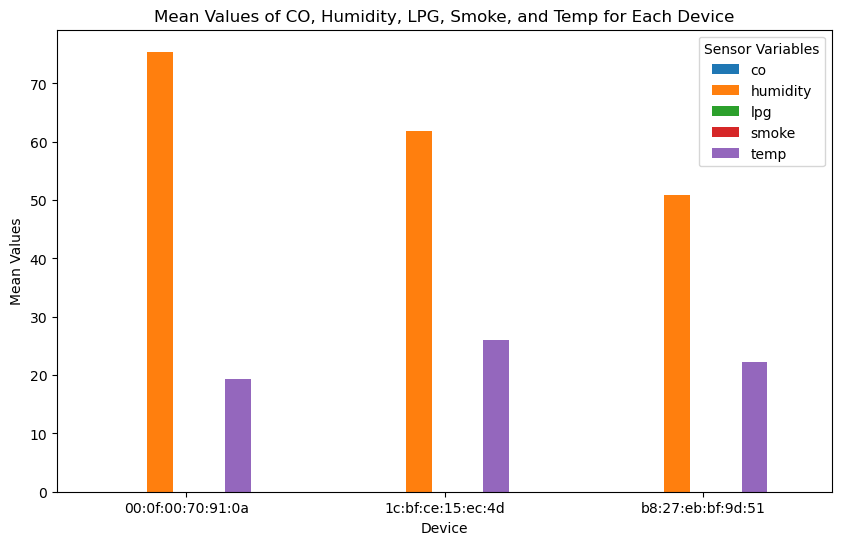

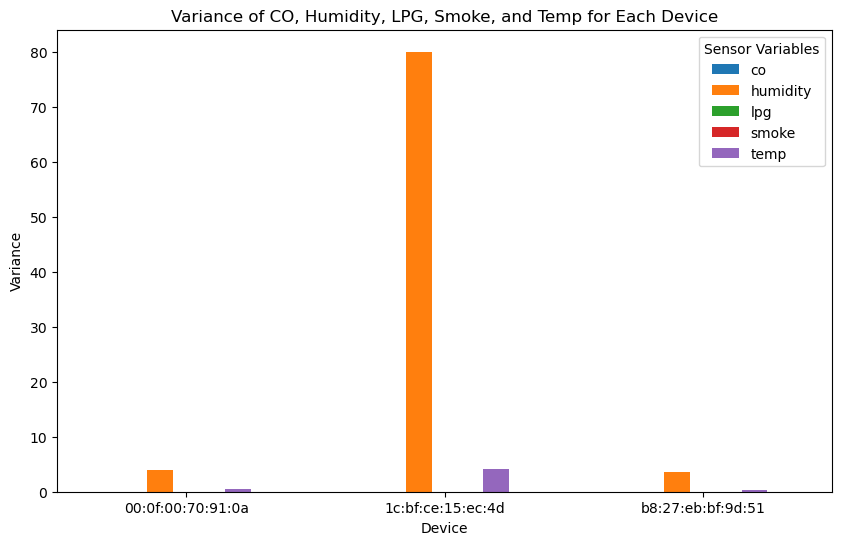

In [125]:

grouped_means = df.groupby('device')[['co', 'humidity', 'lpg', 'smoke', 'temp']].mean()
grouped_variances = df.groupby('device')[['co', 'humidity', 'lpg', 'smoke', 'temp']].var()

grouped_means.plot(kind='bar', figsize=(10,6))
plt.title('Mean Values of CO, Humidity, LPG, Smoke, and Temp for Each Device')
plt.ylabel('Mean Values')
plt.xlabel('Device')
plt.xticks(rotation=0)
plt.legend(title='Sensor Variables')
plt.show()


grouped_variances.plot(kind='bar', figsize=(10,6))
plt.title('Variance of CO, Humidity, LPG, Smoke, and Temp for Each Device')
plt.ylabel('Variance')
plt.xlabel('Device')
plt.xticks(rotation=0)
plt.legend(title='Sensor Variables')
plt.show()


b8:27:eb:bf:9d:51 device is located around lowest humidity area compared to other devices but it has higher variance for humidity, implying that humidity changes more frequently around this device.

### (b)

In [126]:

devices = df['device'].unique()

for device in devices:
    mask = df['device'] == device
    df.loc[mask, ['co', 'humidity', 'lpg', 'smoke', 'temp']] = ((df.loc[mask, ['co', 'humidity', 'lpg', 'smoke', 'temp']] - 
    df.loc[mask, ['co', 'humidity', 'lpg', 'smoke', 'temp']].mean())) / df.loc[mask, ['co', 'humidity', 'lpg', 'smoke', 'temp']].std()

print(df[['device', 'co', 'humidity', 'lpg', 'smoke', 'temp']])



                   device        co  humidity       lpg     smoke      temp
0       b8:27:eb:bf:9d:51 -1.080793  0.098428 -1.093491 -1.091260  0.871610
1       00:0f:00:70:91:0a -0.464451  0.281222 -0.458333 -0.460392  0.524162
2       b8:27:eb:bf:9d:51 -1.044864  0.045488 -1.056107 -1.054137  0.664099
3       1c:bf:ce:15:ec:4d  0.687051  1.664629  0.696248  0.694633  0.480890
4       b8:27:eb:bf:9d:51 -1.060344  0.045488 -1.072209 -1.070127  0.664099
...                   ...       ...       ...       ...       ...       ...
405179  00:0f:00:70:91:0a  0.147282 -0.073063  0.207861  0.197069 -0.252493
405180  b8:27:eb:bf:9d:51  0.577180 -1.225075  0.591201  0.588734 -0.165945
405181  1c:bf:ce:15:ec:4d  1.115988  1.541651  1.119565  1.118965  0.283499
405182  00:0f:00:70:91:0a  0.147282 -0.073063  0.207861  0.197069 -0.252493
405183  b8:27:eb:bf:9d:51  0.634848 -1.278015  0.648416  0.646034 -0.165945

[405184 rows x 6 columns]



### (c)

In [127]:

df_one_hot = pd.get_dummies(df, columns=['device', 'light', 'motion'])

### (d)

In [128]:
df_one_hot.head(20)

,ts,co,humidity,lpg,smoke,temp,device_00:0f:00:70:91:0a,device_1c:bf:ce:15:ec:4d,device_b8:27:eb:bf:9d:51,light_False,light_True,motion_False,motion_True
0,1.594512e+09,-1.080793,0.098428,-1.093491,-1.091260,0.871610,False,False,True,True,False,True,False
1,1.594512e+09,-0.464451,0.281222,-0.458333,-0.460392,0.524162,True,False,False,True,False,True,False
2,1.594512e+09,-1.044864,0.045488,-1.056107,-1.054137,0.664099,False,False,True,True,False,True,False
3,1.594512e+09,0.687051,1.664629,0.696248,0.694633,0.480890,False,True,False,False,True,True,False
4,1.594512e+09,-1.060344,0.045488,-1.072209,-1.070127,0.664099,False,False,True,True,False,True,False
5,1.594512e+09,0.649527,1.787605,0.659043,0.657370,0.480890,False,True,False,False,True,True,False
6,1.594512e+09,-1.044841,0.045488,-1.056083,-1.054113,0.664099,False,False,True,True,False,True,False
7,1.594512e+09,-0.398156,0.281222,-0.383561,-0.387058,0.524162,True,False,False,True,False,True,False
8,1.594512e+09,0.507419,1.787605,0.517887,0.516039,0.480890,False,True,False,False,True,True,False
9,1.594512e+09,-1.055167,0.045488,-1.066824,-1.064779,0.664099,False,False,True,True,False,True,False


### (e)

The ts represent timestemp variable. it is a continuous variable so it can't be categorised. it is already in its ideal format.

## Problem 1.3

In [129]:

ind_var = ['co', 'humidity', 'lpg', 'smoke', 'temp']

# new features
df['mean'] = df[ind_var].mean(axis=1)
df['geometric_mean'] = df[ind_var].abs().apply(sps.gmean, axis=1)
df['harmonic_mean'] = df[ind_var].abs().apply(sps.hmean, axis=1)
df['variance'] = df[ind_var].var(axis=1)
df['kurtosis'] = df[ind_var].apply(sps.kurtosis, axis=1)
df['skewness'] = df[ind_var].apply(sps.skew, axis=1)


df[['mean', 'geometric_mean', 'harmonic_mean', 'variance', 'kurtosis', 'skewness']].head(40)


,mean,geometric_mean,harmonic_mean,variance,kurtosis,skewness
0,-0.459101,0.643851,0.355540,0.817552,-1.268521,0.673607
1,-0.115558,0.428502,0.417687,0.231202,-1.626008,0.504156
2,-0.489104,0.511869,0.189809,0.641322,-1.365727,0.626984
3,0.844690,0.767316,0.713105,0.218513,0.083334,1.347752
4,-0.498619,0.516485,0.190115,0.654782,-1.374738,0.622674
5,0.846887,0.752883,0.692806,0.282264,0.157954,1.420887
6,-0.489090,0.511862,0.189809,0.641303,-1.365713,0.626990
7,-0.072678,0.387290,0.379765,0.195721,-1.589427,0.520788
8,0.761968,0.650609,0.589734,0.328947,0.246717,1.497492
9,-0.495437,0.514944,0.190014,0.650264,-1.371752,0.624102


# **2. Empirical Risk Minimization and the Law of Large Numbers**

## Problem 2.1

### (a)

In [130]:

sample_sizes = np.arange(1, 10001)
emp_ave_fair = np.zeros(len(sample_sizes))


for n in sample_sizes:
    rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=n)
    emp_ave_fair[n-1] = np.mean(rolls)

print(emp_ave_fair)


[6.         3.5        3.         ... 3.46359272 3.46294629 3.4571    ]


### (b)

In [131]:

average = (1+2+3+4+5+6) / 6
excpt_val_fair = average 

abs_discrep_fair = np.abs(emp_ave_fair - excpt_val_fair)

print(abs_discrep_fair)


[2.5        0.         0.5        ... 0.03640728 0.03705371 0.0429    ]


### (c)



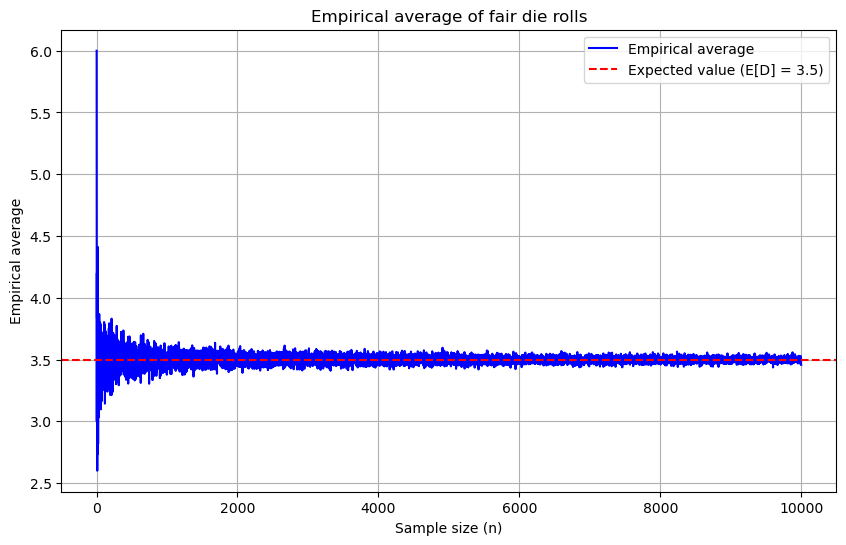

In [132]:

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, emp_ave_fair, label='Empirical average', color='blue')
plt.axhline(y=excpt_val_fair, color='red', linestyle='--', label='Expected value (E[D] = 3.5)')
plt.title('Empirical average of fair die rolls')
plt.xlabel('Sample size (n)')
plt.ylabel('Empirical average')
plt.legend()
plt.grid()
plt.show()


From observation of the output graph, it can be stated that as number of samples increases in the process of dice rolling experiment. the empirical average is converging to it's expected value.

### (d)

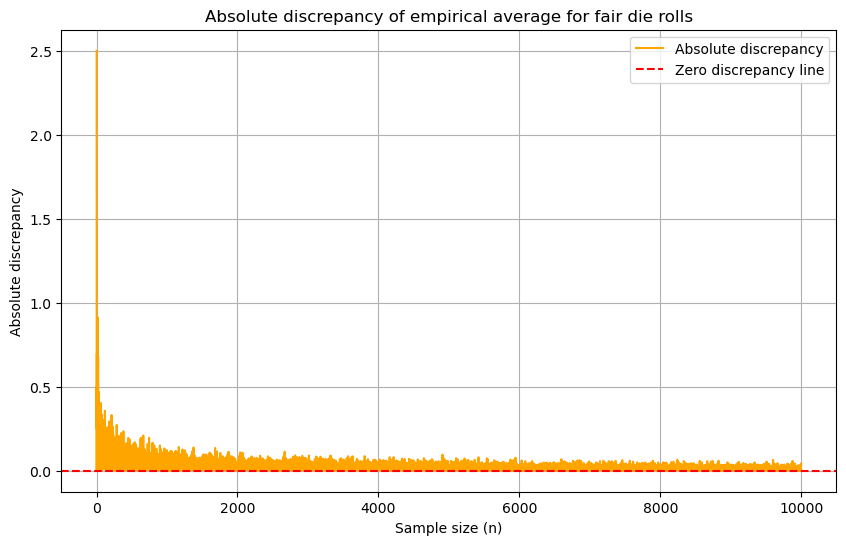

In [133]:

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, abs_discrep_fair, label='Absolute discrepancy', color='orange')
plt.axhline(y=0, color='red', linestyle='--', label='Zero discrepancy line')
plt.title('Absolute discrepancy of empirical average for fair die rolls')
plt.xlabel('Sample size (n)')
plt.ylabel('Absolute discrepancy')
plt.legend()
plt.grid()
plt.show()


At the starting of the experiment with the less data absolute discrepancy of empirical average was very large. as experiment continues with increasing samples discrepancy decreases.

## Problem 2.2

### (a)

In [134]:

probab = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]

emp_ave_unfair = np.zeros(len(sample_sizes))

for n in sample_sizes:
    rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=n, p=probab)
    emp_ave_unfair[n-1] = np.mean(rolls)

print(emp_ave_unfair)

[6.         3.         5.66666667 ... 4.4964993  4.51005101 4.5029    ]


### (b)

In [135]:

unfairave = (1 * 0.1 + 2 * 0.1 + 3 * 0.1 + 4 * 0.1 + 5 * 0.1 + 6 * 0.5)  # = 4.0
excpt_val_unfair = unfairave 
print(unfairave)


abs_discrep_unfair = np.abs(emp_ave_unfair - excpt_val_unfair)

print(abs_discrep_unfair)

4.5
[1.5        1.5        1.16666667 ... 0.0035007  0.01005101 0.0029    ]


### (c)

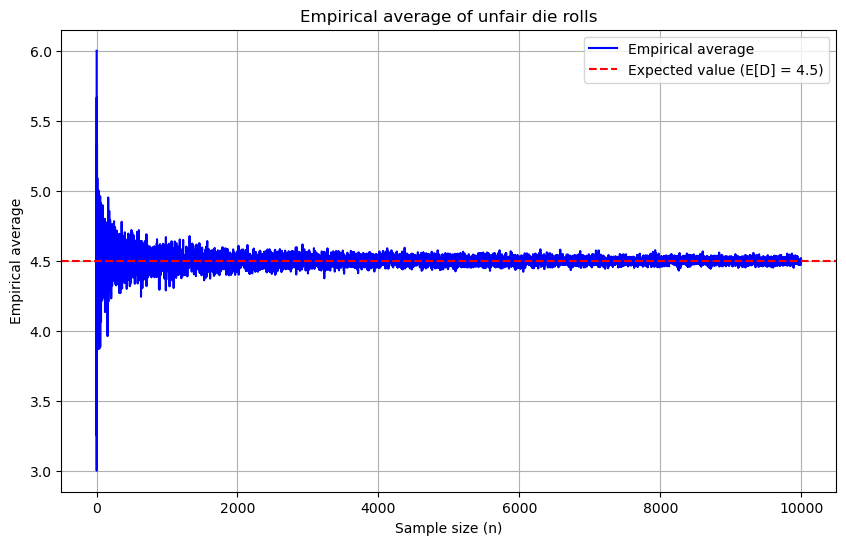

In [136]:

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, emp_ave_unfair, label='Empirical average', color='blue')
plt.axhline(y=excpt_val_unfair, color='red', linestyle='--', label='Expected value (E[D] = 4.5)')
plt.title('Empirical average of unfair die rolls')
plt.xlabel('Sample size (n)')
plt.ylabel('Empirical average')
plt.legend()
plt.grid()
plt.show()

From the graph, it can be stated that empirical average for unfair die rolling experiment also applies same law of large numbers principle where larger sample sizes provide better approximations and converges to true expected value.The law of large numbers is useful to minimise difference between empirical risk and expected value.

### (d)

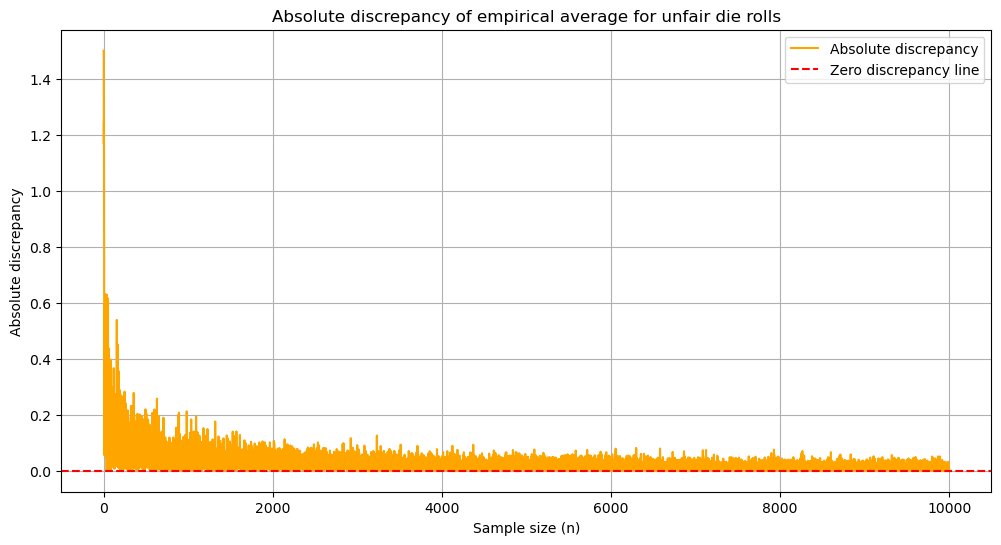

In [137]:

plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, abs_discrep_unfair, label='Absolute discrepancy', color='orange')
plt.axhline(y=0, color='red', linestyle='--', label='Zero discrepancy line')
plt.title('Absolute discrepancy of empirical average for unfair die rolls')
plt.xlabel('Sample size (n)')
plt.ylabel('Absolute discrepancy')
plt.legend()
plt.grid()
plt.show()


same as the fair die rolling experiment in unfair rolling experiment absolute discrepancy decreases when large number of samples have been taken to perform experiment.